In [2]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the csv files
df = pd.read_csv('F:/DataVizCaseStudies/HR_Data_Analysis/HR_data.csv')

In [ ]:
df

In [5]:
# map the values convert into numbers
map_data = {'accounting':1,'hr':2,'IT':3, 'management': 4 ,'marketing':5, 'product_mng' :6 , 
         'RandD':7,'sales':8,'support':9,'technical':10}

In [7]:
df2 = df.applymap(lambda x :map_data.get(x) if x in map_data else x )

In [8]:
df2.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary scale
0,0.38,0.53,2,157,3,0,1,0,8,low
1,0.80,0.86,5,262,6,0,1,0,8,medium
2,0.11,0.88,7,272,4,0,1,0,8,medium
3,0.72,0.87,5,223,5,0,1,0,8,low
4,0.37,0.52,2,159,3,0,1,0,8,low


In [9]:
#Convert salary into categorical numbers
map_data = {'low':1,'medium':2,'high':3}

df3 =df2.applymap(lambda x: map_data.get(x) if x in map_data else x)

In [10]:
df3.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary scale
0,0.38,0.53,2,157,3,0,1,0,8,1
1,0.80,0.86,5,262,6,0,1,0,8,2
2,0.11,0.88,7,272,4,0,1,0,8,2
3,0.72,0.87,5,223,5,0,1,0,8,1
4,0.37,0.52,2,159,3,0,1,0,8,1


In [11]:
#drop the trget column
df4= df3.drop(df3.columns[[6]],axis=1)

In [12]:
print (df4.shape)

(14999, 9)


In [13]:
print (df3['left'].value_counts())

0    11428
1     3571
Name: left, dtype: int64


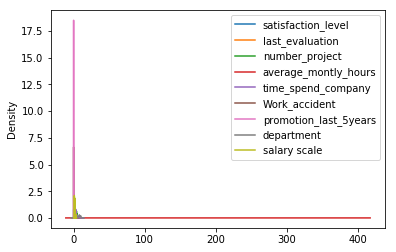

In [15]:
df4.plot(kind='kde')


In [16]:
# use pearson test to find the corelation between the attributes
corr_df = df3.corr(method='pearson')

In [17]:
corr = df3.corr()

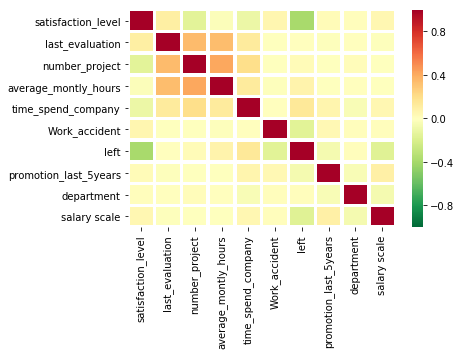

In [18]:
#sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
sns.heatmap(corr, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , linewidths=2.5,xticklabels = corr.columns.values, yticklabels = corr.columns.values)
#Salary scale is the main factor to leave the company

Text(0.5,1,'Employee Salary vs Attrition')

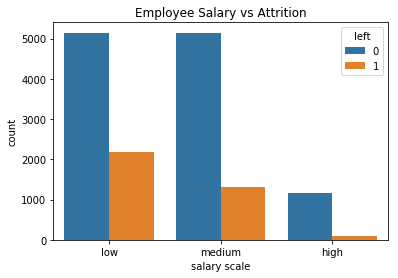

In [19]:

sns.countplot(x = 'salary scale', hue ='left',data= df).set_title('Employee Salary vs Attrition')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

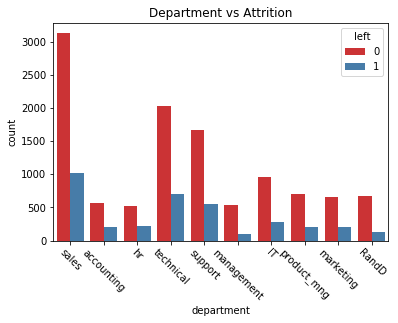

In [20]:
# department from where most of the people left
sns.countplot(x = 'department', hue ='left',data= df,palette="Set1").set_title('Department vs Attrition')
plt.xticks(rotation=-45)